In [1]:
import json
import numpy as np

path = "../tweet_data/"

files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", \
        "tweets_#nfl.txt", "tweets_#patriots.txt", \
        "tweets_#sb49.txt", "tweets_#superbowl.txt"]

for i, fl in enumerate(files):
    print "files[" + str(i) + "] => " + fl

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#nfl.txt
files[3] => tweets_#patriots.txt
files[4] => tweets_#sb49.txt
files[5] => tweets_#superbowl.txt


In [2]:
# the extracted data contains
# 0. the followers number 1. the favourite_count 2. the citation date 
# 3. the length of the title 4. the number of the twitters
def load_file(file):
    '''
    load the time, follows, and retweets
    '''
    result = []
    time_min = -1
    for line in open(path + file, 'r') :
        tmp = []
        a = json.loads(line)
        tmp.append(a['author']['followers'])
        tmp.append(a['tweet']['user']['favourites_count'])
        tmp.append(a['citation_date'])
        if time_min > a['citation_date'] or time_min == -1:
            time_min = a['citation_date']
        tmp.append(len(a['title']))
        result.append(tmp)
    return time_min, result

In [3]:
# process the time
def pro_date(date, time_min):
    time_min = time_min // 3600
    return date // 3600 - time_min

In [4]:
def process_data(time_min, data):
    max_date = 0
    for p in data:
        p[2] = pro_date(p[2], time_min)
        p.append(1)
        max_date = max(max_date, p[2])
        
    # count the data and get the trainset
    train_set = []
    for i in range(max_date + 1):
        train_set.append([0] * 5)

    for p in data:
        x = train_set[p[2]]
        x[2] = p[2]
        for i in [0, 1, 3, 4]:
            x[i] += p[i]
            
    target = []
    for i, v in enumerate(train_set[:-1]):
        target.append(train_set[i + 1][4])
    train_set = train_set[:-1]
    
    return train_set, target

In [5]:
from sklearn import linear_model

def regression(train_set, target):
    lr = linear_model.LinearRegression().fit(train_set, target)
    predict = lr.predict(train_set)
    return predict

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

def print_stat(train, predict, target, file_name):
    print "file is " + file_name
    print 'R-squared', r2_score(target, predict)
    x = train
    y = target
    lm = sm.OLS(y, x).fit()
    # 0. the followers number 1. the favourite_count 2. the citation date 
    # 3. the length of the title 4. the number of the twitters
    print(lm.summary())

In [12]:
train_feature_record = []
target_record = []
predict_record = []

for f in files:
    time_min, raw_data = load_file(f)
    train, target = process_data(time_min, raw_data)
    predict = regression(train, target)
    
    train_feature_record.append(train)
    target_record.append(target_record)
    predict_record.append(predict)
    
    print_stat(train, predict, target, f)
    print '\n\n---------------------------------------------------------------------------\n\n'
    

file is tweets_#gohawks.txt
R-squared 0.620492755788223
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     204.9
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          5.01e-125
Time:                        19:28:08   Log-Likelihood:                -4702.0
No. Observations:                 578   AIC:                             9414.
Df Residuals:                     573   BIC:                             9436.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

file is tweets_#sb49.txt
R-squared 0.8031824565446466
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     482.5
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          2.12e-203
Time:                        19:31:18   Log-Likelihood:                -5720.2
No. Observations:                 582   AIC:                         1.145e+04
Df Residuals:                     577   BIC:                         1.147e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [22]:
import matplotlib.pyplot as plt

def plot_fit_feature(feature, predict, feature_name):
    fig, ax = plt.subplots()
    area = np.pi * (4)**2/4
    ax.scatter(feature, predict, s = area)
    ax.set_xlabel(feature_name, fontsize = 20)
    ax.set_ylabel('Predicted size', fontsize = 20)
    plt.title('Fitted values vs. ' + feature_name, fontsize = 20)
    plt.show()

In [23]:
def get_feature(feature_set, feature_id):
    return [x[feature_id] for x in feature_set]

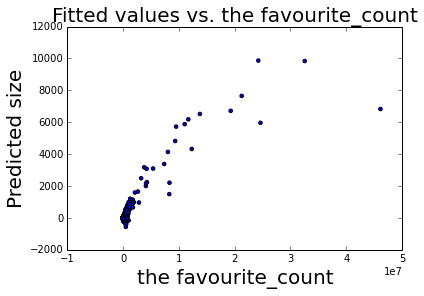

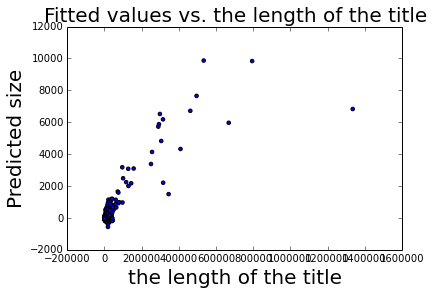

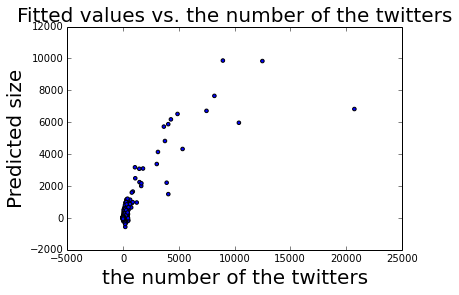

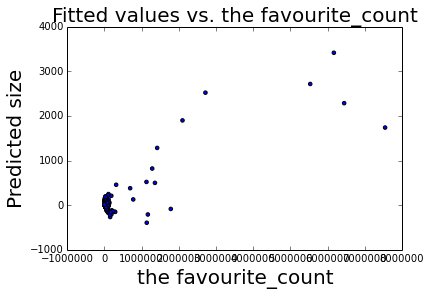

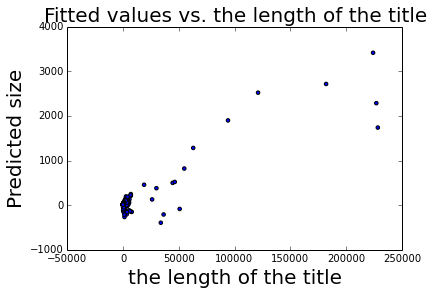

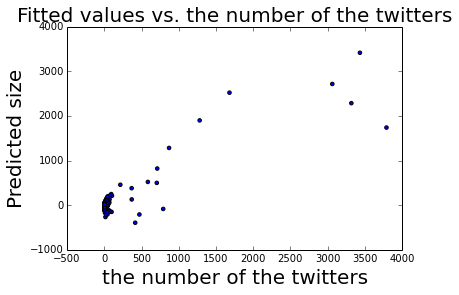

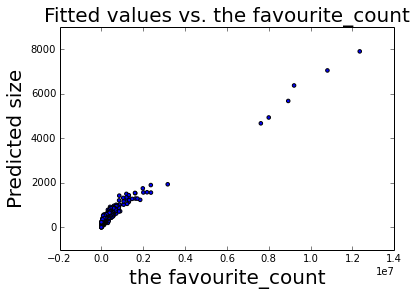

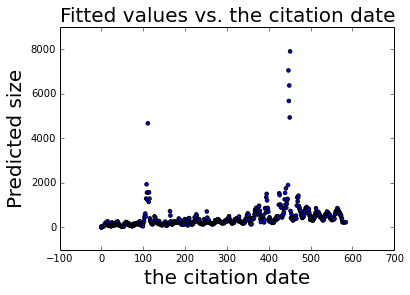

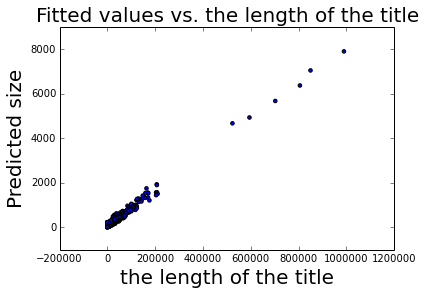

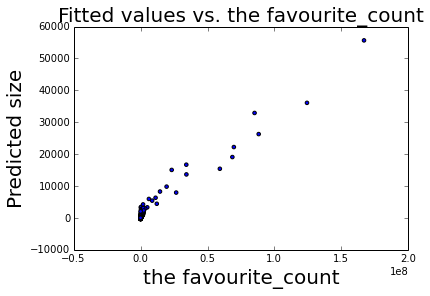

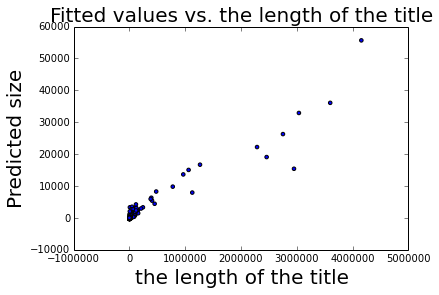

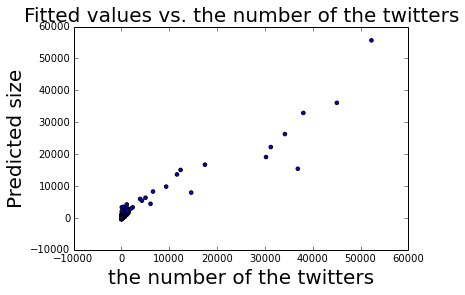

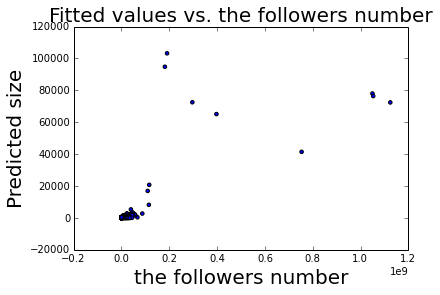

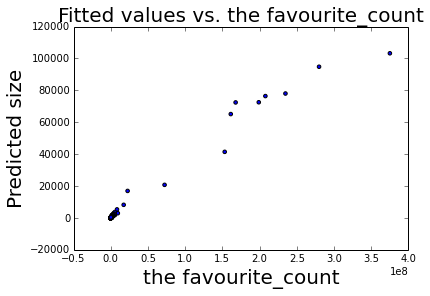

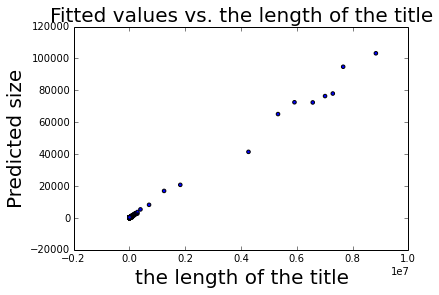

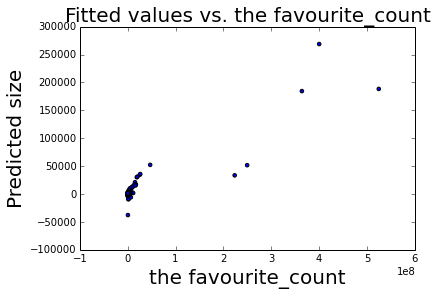

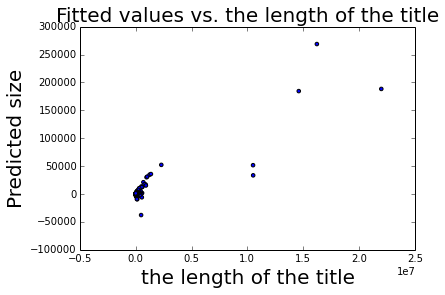

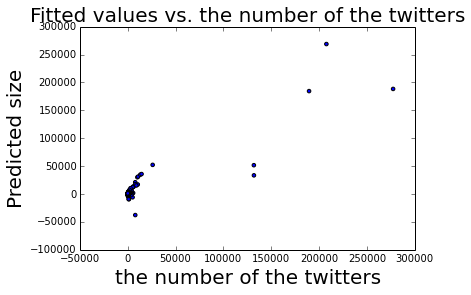

In [24]:
%matplotlib inline

feature_name = {0: "the followers number", 1: "the favourite_count", \
                2: "the citation date", 3: "the length of the title", \
                4: "the number of the twitters"}

best_feature = [[1, 3, 4], [1, 3, 4], [1, 2, 3], [1, 3, 4], [0, 1, 3], [1, 3, 4]]
for i, fea in enumerate(best_feature):
    train_v = train_feature_record[i]
    target_v = target_record[i]
    predict_v = predict_record[i]
    for k in fea:
        train_feature = get_feature(train_v, k)
        plot_fit_feature(train_feature, predict_v, feature_name[k])